In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
A = np.random.normal(0, 1, (3,2))
_,S,_ = np.linalg.svd(A, full_matrices=True)
#print rank according to SVD and singular values being larger than some epsilon selected
print(np.sum(S>0.05))

2


In [3]:
V = np.random.normal(0, 1, (2, 500))
X = np.matmul(A, V)
U,S_x,Vh = np.linalg.svd(X, full_matrices=True)

#print rank according to SVD and singular values being larger than some epsilon selected
print(S_x)
print(np.sum(S_x>0.05))
#We expect the rank of X to be 2 since it is generated by a multiplication of matrices of rank 2. The multiplication will not changes the rank since both are of rank 2

w, v = np.linalg.eig(np.matmul(X, X.transpose()))

print("Eigenvectors of XX^T vs left singular values of X:")
print(v)
print(U)
#We see that they are the same up to reordering of the columns
print("Singular values squared vs Eigenvalues of X:")
print([x*x for x in S_x])
print(w)
#We see that they are the same up to reordering
print("Energy vs sum of squares of singular values:")
print(np.linalg.norm(X, 'fro')**2)
print(np.sum([x*x for x in S_x]))
#indeed, we see that the two are the same
P = np.array([u for u in U.transpose()[S_x>0.05]]).transpose()

print("[U1 U2]:")
print(P)
print(A)

#None of the singular values are exactly 0 since the noise from randomness makes the columns not exactly linearly dependent. However, they are so close to linearly dependent that the singular values are extremely small. Then we disregard singular values that are below some chosen epsilon value when considering the rank of the matrix, as seen in the above.


[5.03525621e+01 2.93361536e+01 6.93129732e-15]
2
Eigenvectors of XX^T vs left singular values of X:
[[ 0.62624112 -0.77530448 -0.08200621]
 [-0.50125787 -0.48096766  0.71931263]
 [ 0.59712864  0.40935689  0.6898292 ]]
[[-0.62624112 -0.77530448 -0.08200621]
 [ 0.50125787 -0.48096766  0.71931263]
 [-0.59712864  0.40935689  0.6898292 ]]
Singular values squared vs Eigenvalues of X:
[2535.3805075274754, 860.6099091802947, 4.8042882526451946e-29]
[2.53538051e+03 8.60609909e+02 2.42359095e-13]
Energy vs sum of squares of singular values:
3395.99041670777
3395.9904167077702
[U1 U2]:
[[-0.62624112 -0.77530448]
 [ 0.50125787 -0.48096766]
 [-0.59712864  0.40935689]]
[[-0.32943824  1.68527912]
 [-1.0918955  -0.71265429]
 [ 1.09940003  0.94345757]]


The left singular vectors of $X$ corresponding to the two largest singular values span the same vector space as $A$. Since $A$ is rank deficient, we can see that $X = AV$ is the projection of the columns of $V$ into the span of $A$ as some two dimensional subspace of $\mathbb{R^{3}}$. Then since the left singular values of $X$ correspond to the column space of $X$ and the effective rank of $X$ is 2, the two left singular vectors of the two largest singular values are the components which comprise the column space of $X$, which is the projection of data onto the column space of $A$. It can be reasoned then that the left singular vectors and the columns of $A$ span the same vector space.

Let $i \in \{1, 2, 3\}$. Then let $x_{i}$ denote the $i$th entry of any data sample in $X$. Then since each $x_{i}$ is independent as well as each from the normal distribution with mean $0$ and variance $1$, then the expected value of each $x_{i} = E(x_{i}) = E(N(0,1)) = 0$ 

In [4]:
#We expect there to only require 2 principal components to effectively represent X. This is because X has dimension 2.
Px = np.matmul(P.transpose(), X)
Ux = np.matmul(P,Px)
error = np.linalg.norm(X - Ux)**2
print(error)
#indeed, the error is essentially 0

7.00557799679897e-28


In [5]:

P = U.transpose()[0].transpose().reshape((3,1))
Px = np.matmul(P.transpose(),X)
Ux = np.matmul(P,Px)
error = np.linalg.norm(X - Ux)**2
print("Error vs square of the singular values excluded:")
print(error)
print(S_x[1]**2)
#indeed the error is the same as the square of the second largest principal component (since the smaller ones are negligible)

Error vs square of the singular values excluded:
860.6099091802945
860.6099091802947


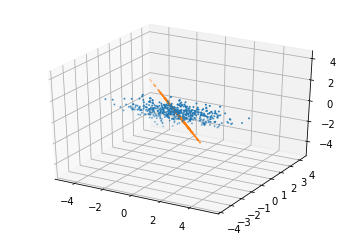

In [6]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d') )

points = X.transpose()
x,y,z = zip(*points)
ax.scatter(x,y,z, s=1)
Px1 = np.array([[x[0], x[1], 0] for x in Ux.transpose()])
points = Px1
a,b,c = zip(*points)
ax.scatter(a,b,c, s=1)
plt.show()

In [7]:
c = np.random.normal(0, 3**0.5, (3,1))

In [8]:
V = np.random.normal(0, 1, (2, 500)) #We may comment out the generation of this if we want it to be constant like A
X = np.matmul(A, V) + c


In [9]:

U,S_x,Vh = np.linalg.svd(X, full_matrices=True)

#print rank according to SVD and singular values being larger than some epsilon selected
print("Singular values:")
print(S_x)
print("Rank:")
print(np.sum(S_x>0.05))
P = np.array([u for u in U.transpose()[S_x>min(S_x)]]).transpose()
print("[U1 U2]:")
print(P)
#Indeed the rank is more than 2, which is not expected. This is because the shift by c changes the rank of the distribution though the rank of data is still 2
#the rank would not increase in the case where c is a linear combination of the two natural dimensions of the data

Singular values:
[90.61354645 45.556074   18.62422324]
Rank:
3
[U1 U2]:
[[-0.89212526  0.01383713]
 [ 0.39325576 -0.46825494]
 [ 0.2224015   0.88348506]]


In [10]:
Xhat = np.matmul(P, np.matmul(P.transpose(), X))
error = np.linalg.norm(X - Xhat, 'fro')**2
print(error)
#We see that the error is non-negligible when we do not center the data

346.86169113341236


In [11]:

m = np.array([[np.mean(x)] for x in X])
print("Mean:")
print(m)
U,S_x,Vh = np.linalg.svd(X - m, full_matrices=True)

#print rank according to SVD and singular values being larger than some epsilon selected
print("Singular values:")
print(S_x)
print("Rank:")
print(np.sum(S_x>0.05))

P = np.array([u for u in U.transpose()[S_x>min(S_x)]]).transpose()
print("[U1 U2]:")
print(P)

Xhat = np.matmul(P, np.matmul(P.transpose(), X - m)) + m
error = np.linalg.norm(X - Xhat, 'fro')**2
print("Error:")
print(error)
#the error is essentially 0 when the data is centered

Mean:
[[-3.2066395 ]
 [ 1.43141908]
 [ 1.37758213]]
Singular values:
[5.12084392e+01 2.99351486e+01 8.24624229e-15]
Rank:
2
[U1 U2]:
[[-0.57697999 -0.81263095]
 [ 0.53010658 -0.44897255]
 [-0.62135424  0.37155697]]
Error:
2.3787854077906725e-28


In [12]:
N = np.random.normal(0, 0.1, (3,500))
V = np.random.normal(0, 1, (2, 500)) #We may comment out the generation of this if we want it to be constant like A
X = np.matmul(A, V) + N
Xnorm = np.array([x/np.linalg.norm(x) for x in X.transpose()]).transpose()
U,S_x,Vh = np.linalg.svd(Xnorm, full_matrices=True)

#print rank according to SVD and singular values being larger than some epsilon selected
print(S_x)
print(np.sum(S_x>0.05))
#indeed, the rank of the data is now more than 2

[17.30927061 14.01420911  1.99777226]
3


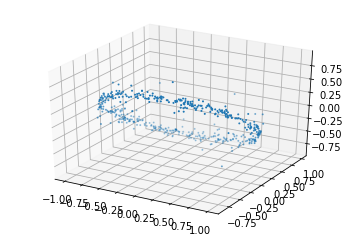

In [13]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d') )
points = Xnorm.transpose()
a,b,c = zip(*points)
ax.scatter(a,b,c, s=1)
plt.show()

[U1 U2]:
[[-0.57015641 -0.81829894]
 [ 0.53785786 -0.43884683]
 [-0.62099162  0.37121463]]
Error vs square of the singular values excluded:
3.991093998115247
3.9910939981152453


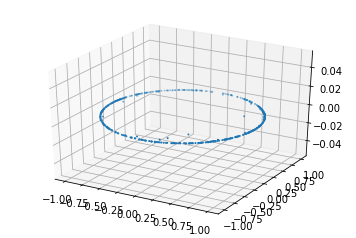

In [14]:
P = np.array([u for u in U.transpose()[S_x>min(S_x)]]).transpose()
print("[U1 U2]:")
print(P)
Xdenoise = np.matmul(P.transpose(), Xnorm)
Xhat = np.matmul(P, Xdenoise)
error = np.linalg.norm(Xnorm - Xhat, 'fro')**2
print("Error vs square of the singular values excluded:")
print(error)
print(S_x[2]**2)
#indeed the error is the same as the square of the third singular value
fig, ax = plt.subplots(subplot_kw=dict(projection='3d') )
XD = np.array([[x[0], x[1], 0] for x in Xdenoise.transpose()]).transpose()
points = XD.transpose()
a,b,c = zip(*points)
ax.scatter(a,b,c, s=1)
plt.show()

In [15]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

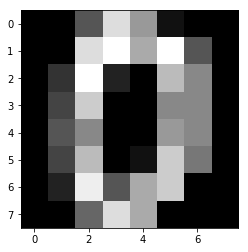

In [16]:
I = images.transpose()
sample_image = images[0].reshape((8,8))
plt.imshow(sample_image, cmap='gray')

Number of singular values needed to retain 90% energy
19


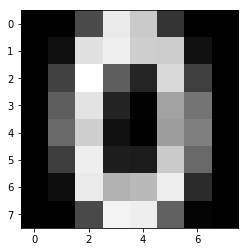

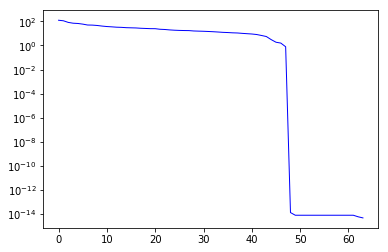

In [17]:
m = np.array([[np.mean(x)] for x in I])
g = m
plt.imshow(g.reshape((8,8)), cmap='gray')
U,S,Vh = np.linalg.svd(I - m, full_matrices=True)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(S, color='blue', lw=1)
ax.set_yscale('log')

i = 0
total = 0

maximum = np.linalg.norm(I-m,  'fro')**2

while total<0.9*maximum:
    total += S[i]**2
    i+=1
print("Number of singular values needed to retain 90% energy")
print(i+1)

(64, 64) (64, 19) (64, 1) (64, 3) (64, 1)


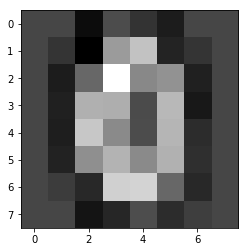

In [21]:
Pk = U.transpose()[:i+1].transpose()
P1 = U.transpose()[:1].transpose()
P3 = U.transpose()[:3].transpose()

print(U.shape, Pk.shape, P1.shape, P3.shape, m.shape)

s_img = images[0].reshape((64,1))
sample_image_P1 = np.matmul(P1, np.matmul(P1.transpose(), s_img))
s_img_P1 = sample_image_P1.reshape((8,8))
plt.imshow(s_img_P1, cmap='gray')

Error vs square of the singular values excluded:
36050.01060573713
36050.010605737145


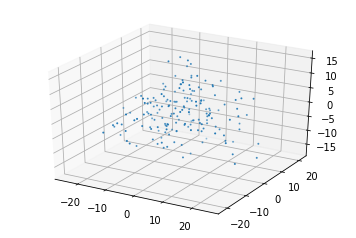

In [19]:
Ifeat = np.matmul(P3.transpose(), I - m)
#print(Ifeat.shape)
Ihat = np.matmul(P3, np.matmul(P3.transpose(), I - m)) + m
error = np.linalg.norm(I - Ihat, 'fro')**2
print("Error vs square of the singular values excluded:")
print(error)
print(np.sum([x*x for x in S[3:]]))
#indeed the error is the sum of the squares of singular values not chosen/used

fig, ax = plt.subplots(subplot_kw=dict(projection='3d') )
points = Ifeat.transpose()
a,b,c = zip(*points)
ax.scatter(a,b,c, s=1)
plt.show()

(64, 178)


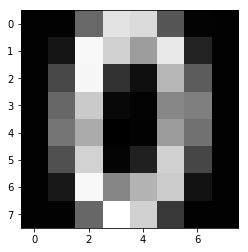

In [20]:
print(Ihat.shape)
sample_image_rec = Ihat.transpose()[0].reshape((8,8))

plt.imshow(sample_image_rec, cmap='gray')